In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from bnlp import NLTKTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/UBMEC/Dataset/UBMEC.xlsx')

In [3]:
df.head

<bound method NDFrame.head of                                                     text   classes
0      এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...       joy
1      ২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...  surprise
2      বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "কোথাও কেউ...       joy
3      এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...       joy
4      কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...  surprise
...                                                  ...       ...
13431  Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...       joy
13432  কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...       joy
13433  আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...       joy
13434          এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।       joy
13435  দুর্নীতি মুক্ত হলে নিশ্চয় চোরও মুক্ত হবে, বিশ্...       joy

[13436 rows x 2 columns]>

In [4]:
df.groupby("classes").describe()

text                                                               
         count unique                                                top freq
classes                                                                      
anger     2480   2422  নাস্তিকদের দালাল একাওর টিভি বন্ধ করা হোক,https...    6
disgust   2079   2049  অপরাধ কারী এবং অপরাধী কে প্রশ্রয় দানকারী দুজন...    6
fear      1361   1348  হট্রগোল আর পরিস্থিতি ঘোলাটে করে নির্বাহী মেজিস...    2
joy       3467   3290                                            ধন্যবাদ   27
sadness   2683   2622  অপরাধ কারী এবং অপরাধী কে প্রশ্রয় দানকারী দুজন...   12
surprise  1366   1341  আমরা কি স্ট্যাটাসের বাকি লাইনগুলো অস্বীকার করব...    4

In [5]:
df['text'] = df['text'].astype(str)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [7]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [8]:
df.columns

Index(['text', 'classes'], dtype='object')

In [9]:
df.head

<bound method NDFrame.head of                                                     text   classes
0      এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...       joy
1      ২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...  surprise
2      বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "কোথাও কেউ...       joy
3      এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...       joy
4      কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...  surprise
...                                                  ...       ...
13431  Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...       joy
13432  কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...       joy
13433  আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...       joy
13434          এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।       joy
13435  দুর্নীতি মুক্ত হলে নিশ্চয় চোরও মুক্ত হবে, বিশ্...       joy

[13436 rows x 2 columns]>

In [11]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df['text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00003 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
01626511109    0.000019
01795280807    0.000026
08             0.000020
10             0.000009
10000          0.000022
                 ...   
৯৮             0.000017
ৰক             0.000007
ৰচ             0.000015
ৰণ             0.000007
ৱঝ             0.000027
Length: 1260, dtype: float64


In [12]:
# Function to remove less important words
def remove_less_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

In [13]:
df['text']  = df['text'] .apply(remove_less_important_words)

In [14]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["classes_bin"] = lb_make.fit_transform(df["classes"])
df[["classes_bin", "classes"]].head(11)

,classes_bin,classes
0,3,joy
1,5,surprise
2,3,joy
3,3,joy
4,5,surprise
5,3,joy
6,3,joy
7,4,sadness
8,3,joy
9,3,joy


In [15]:
df

,text,classes,classes_bin
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy,3
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise,5
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy,3
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy,3
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise,5
...,...,...,...
13431,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy,3
13432,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy,3
13433,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy,3
13434,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,3


In [16]:
df.isnull()

,text,classes,classes_bin
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
13431,False,False,False
13432,False,False,False
13433,False,False,False
13434,False,False,False


In [17]:
df.dropna(inplace=True)

In [18]:
df

,text,classes,classes_bin
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy,3
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise,5
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy,3
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy,3
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise,5
...,...,...,...
13431,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy,3
13432,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy,3
13433,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy,3
13434,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,3


In [20]:
text = df['text'].values.tolist()

In [21]:
df.groupby("classes").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
classes                                                
anger         2480.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
disgust       2079.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
fear          1361.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
joy           3467.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
sadness       2683.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
surprise      1366.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0

In [22]:
df["classes"].value_counts()

joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: classes, dtype: int64

In [23]:
longest_string = max(df["text"], key=len)
print(len(longest_string))

3430


In [25]:
text = df["text"]

In [26]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(13436, 4984)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['classes_bin'], test_size=0.2, random_state=42)

Y_pre = df['classes']
target_names = list(set(Y_pre))

In [29]:
target_names

['disgust', 'surprise', 'anger', 'sadness', 'joy', 'fear']

In [30]:
X_train

<10748x4984 sparse matrix of type '<class 'numpy.float64'>'
	with 105367 stored elements in Compressed Sparse Row format>

In [31]:
y_train

1501     3
11407    5
2777     4
10943    0
8387     2
        ..
5191     2
13418    3
5390     4
860      2
7270     4
Name: classes_bin, Length: 10748, dtype: int32

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [33]:
import seaborn as sn

# Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.38839285714285715
              precision    recall  f1-score   support

     disgust       0.41      0.29      0.34       491
    surprise       0.37      0.06      0.11       416
       anger       0.80      0.21      0.33       275
     sadness       0.38      0.85      0.53       674
         joy       0.34      0.44      0.38       541
        fear       0.79      0.04      0.07       291

    accuracy                           0.39      2688
   macro avg       0.52      0.31      0.29      2688
weighted avg       0.46      0.39      0.33      2688



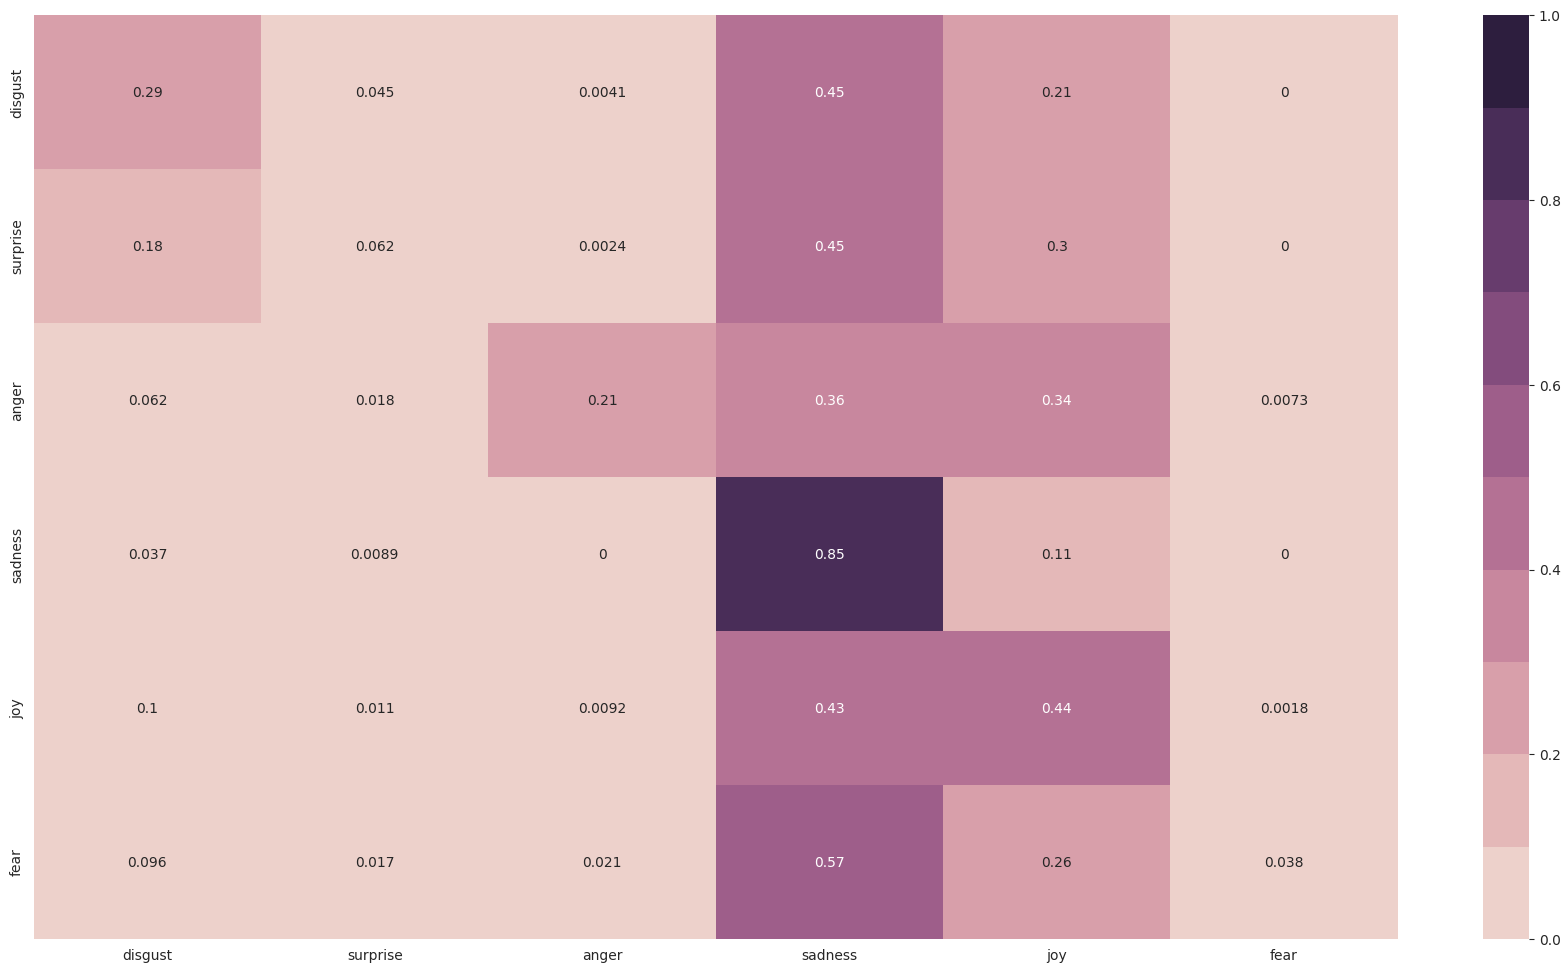

In [35]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [36]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [37]:
from sklearn.svm import SVC


Test set accuracy 0.44642857142857145
              precision    recall  f1-score   support

     disgust       0.36      0.42      0.39       491
    surprise       0.32      0.22      0.26       416
       anger       0.75      0.42      0.54       275
     sadness       0.53      0.71      0.61       674
         joy       0.37      0.46      0.41       541
        fear       0.64      0.19      0.30       291

    accuracy                           0.45      2688
   macro avg       0.50      0.40      0.42      2688
weighted avg       0.47      0.45      0.43      2688



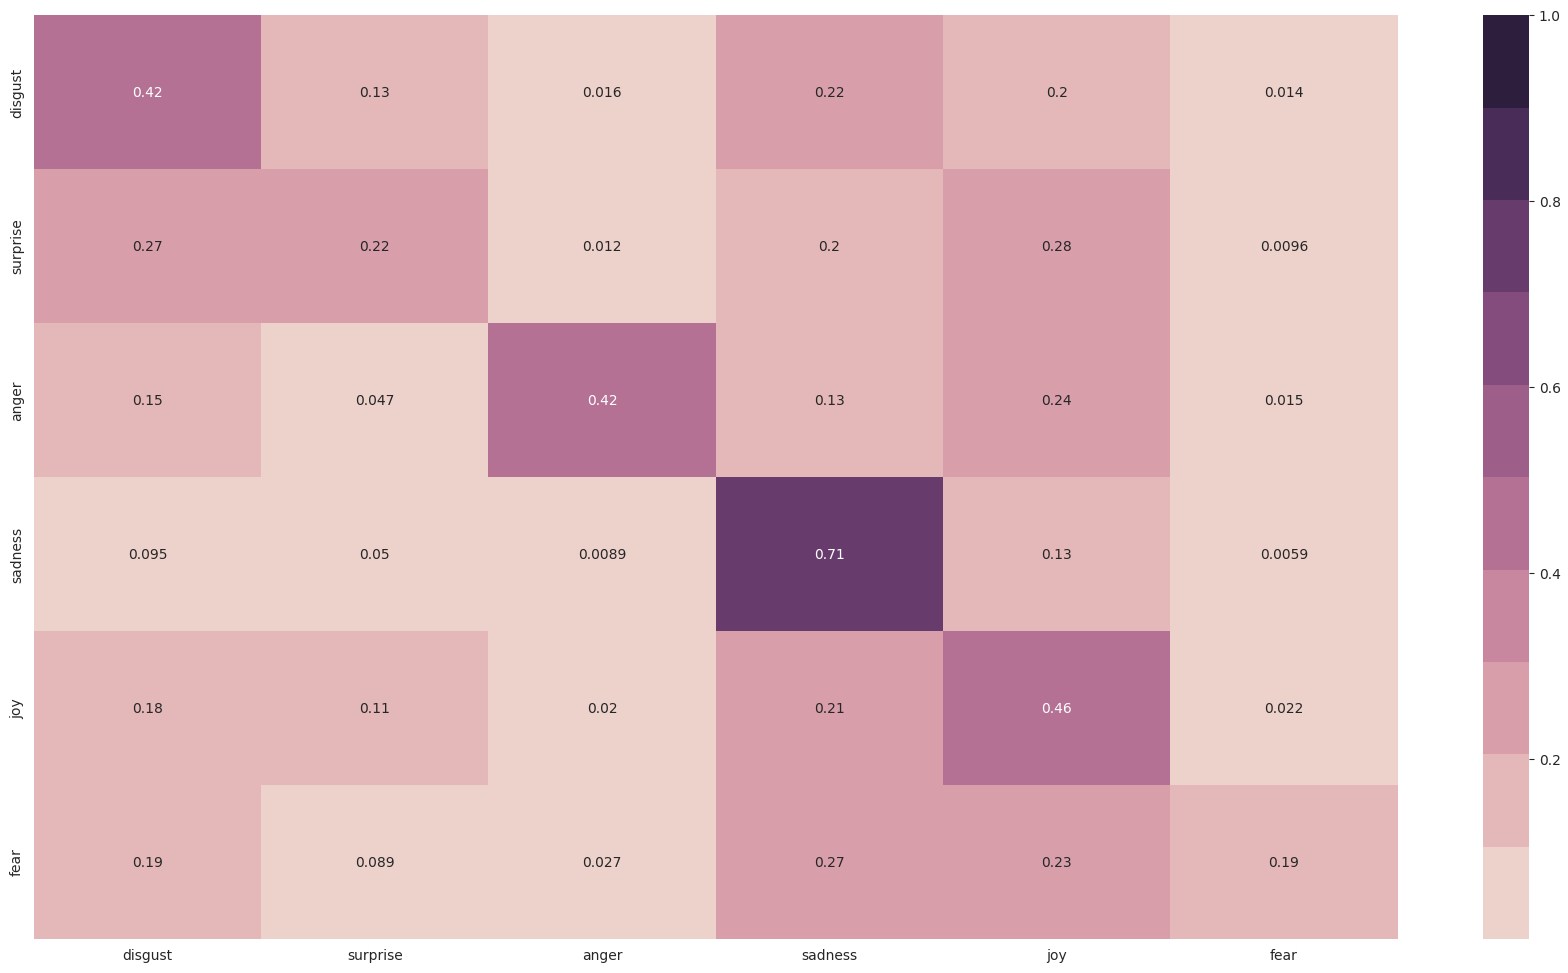

In [38]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [39]:
from xgboost import XGBClassifier

Test set accuracy 0.42150297619047616
              precision    recall  f1-score   support

     disgust       0.35      0.40      0.37       491
    surprise       0.28      0.17      0.21       416
       anger       0.64      0.46      0.53       275
     sadness       0.47      0.69      0.56       674
         joy       0.36      0.37      0.37       541
        fear       0.53      0.24      0.33       291

    accuracy                           0.42      2688
   macro avg       0.44      0.39      0.40      2688
weighted avg       0.42      0.42      0.41      2688



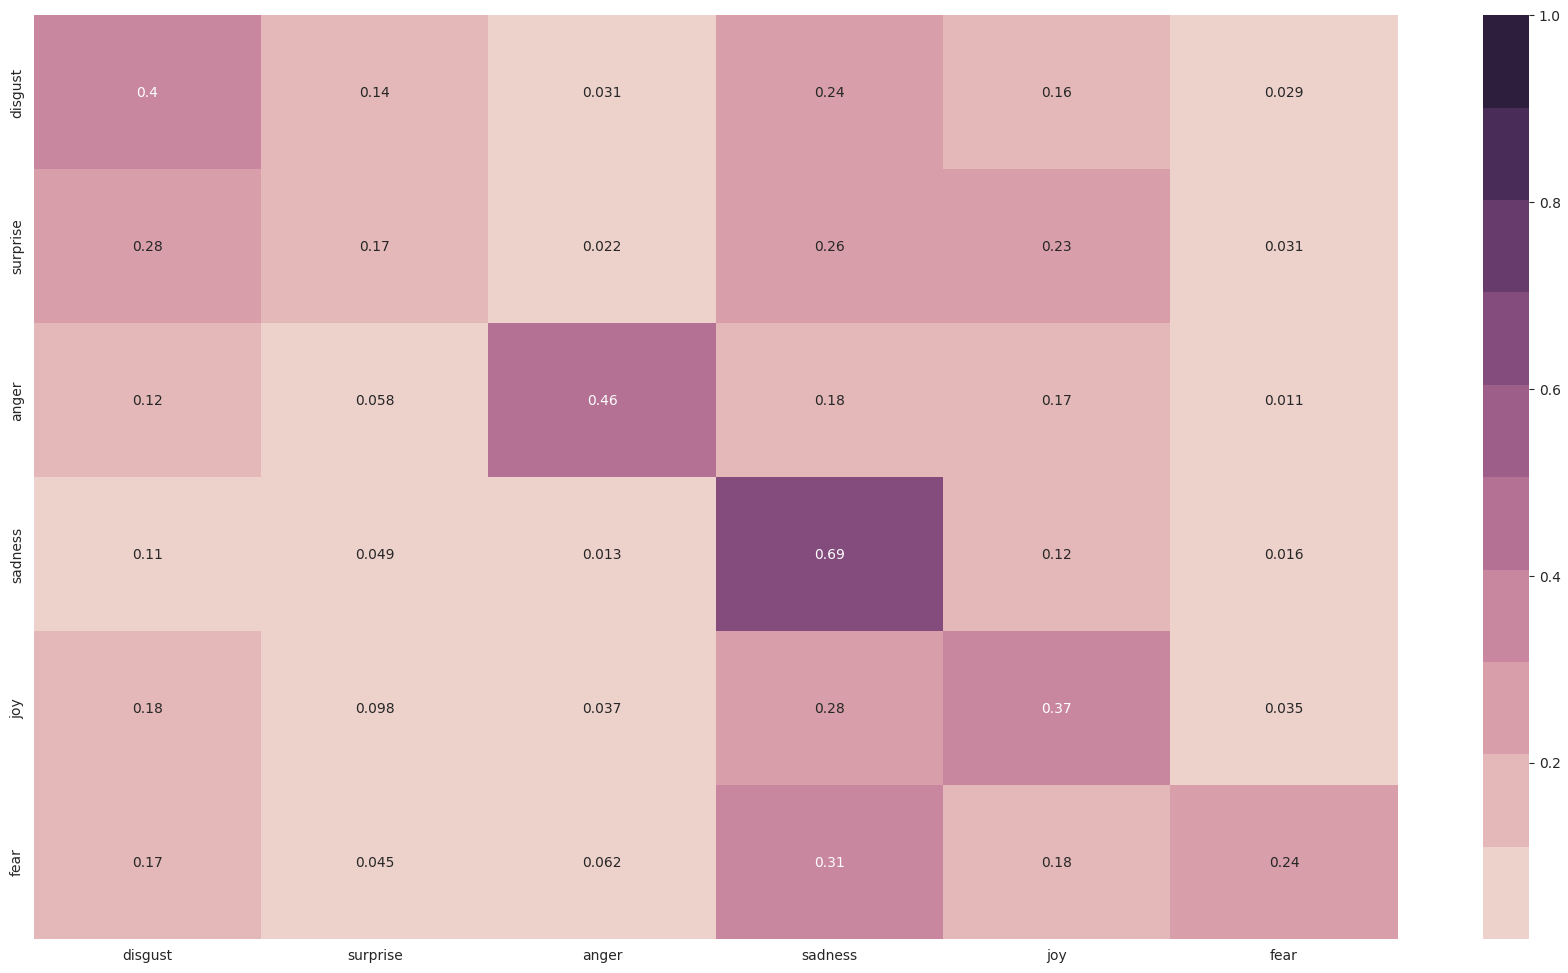

In [40]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.4252232142857143
              precision    recall  f1-score   support

     disgust       0.35      0.39      0.37       491
    surprise       0.29      0.15      0.20       416
       anger       0.68      0.43      0.52       275
     sadness       0.47      0.71      0.57       674
         joy       0.36      0.40      0.38       541
        fear       0.55      0.25      0.34       291

    accuracy                           0.43      2688
   macro avg       0.45      0.39      0.40      2688
weighted avg       0.43      0.43      0.41      2688



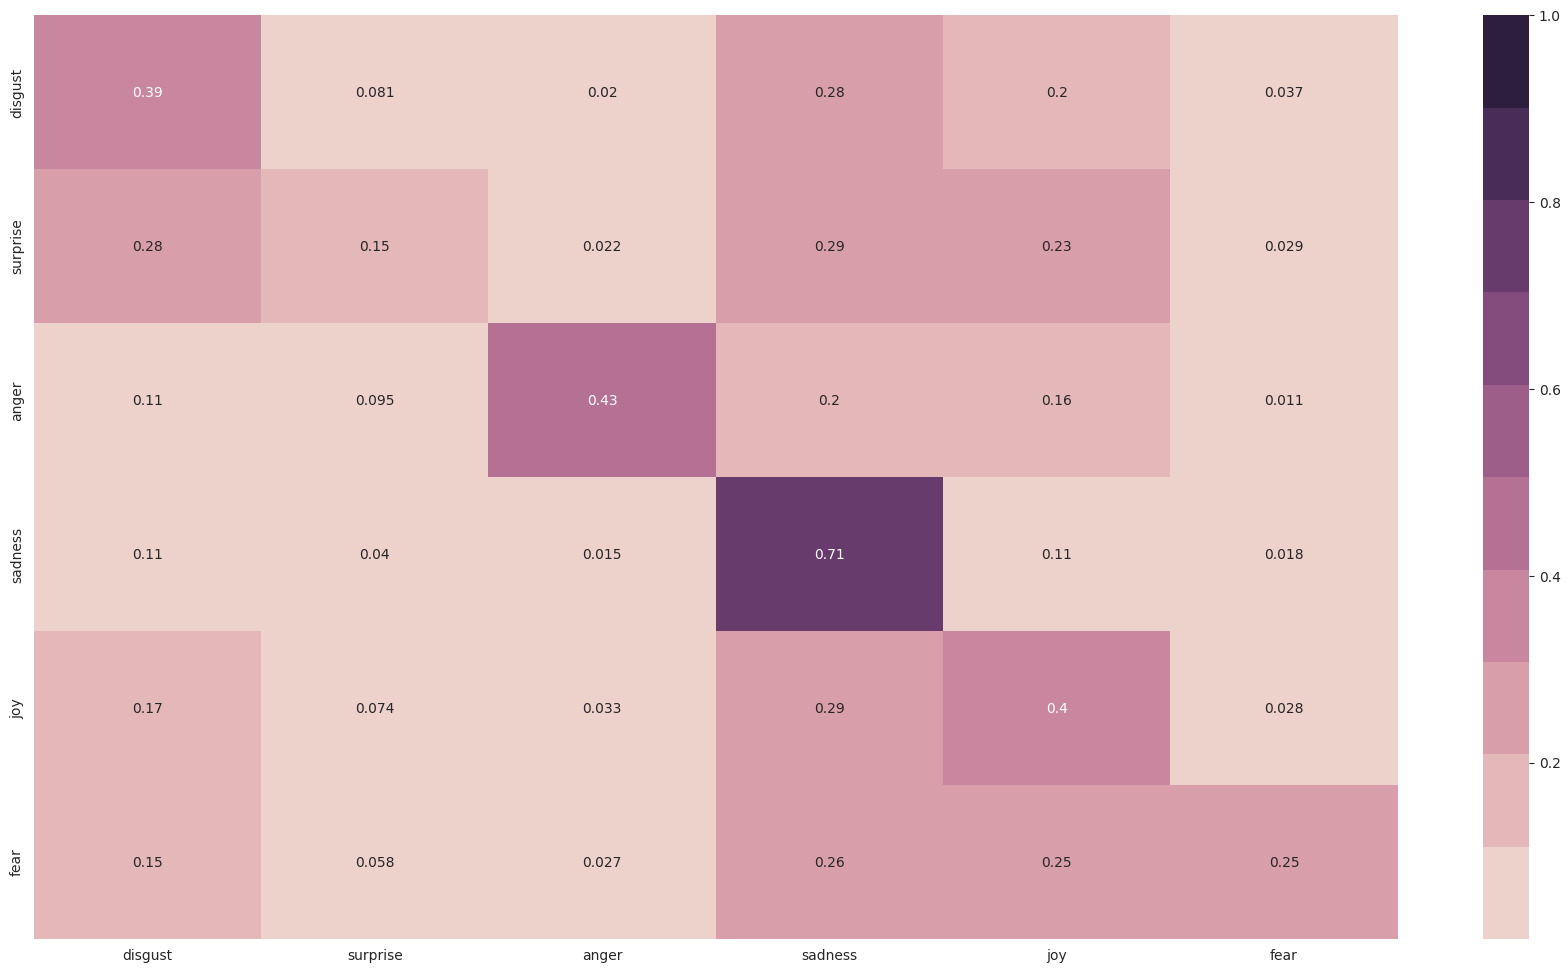

In [42]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  